**Importing the dataset**

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/datasets/netflix_analysis.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
# Display column names as a list
column_names = list(df.columns)
print(column_names)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [4]:
missing_data = df.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


In [5]:
df['director'] = df['director'].fillna('No Records')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Not Specified')
df['date_added'] = df['date_added'].fillna('Not Available')
df['rating'] = df['rating'].fillna('Not Rated')

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Records,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,No Records,Nasty C,Not Specified,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,No Records,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
missing_data = df.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [8]:
unique_types = df['rating'].unique()

# Display the unique values
print(unique_types)

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'Not Rated'
 'TV-Y7' 'PG' 'G' 'NC-17' 'TV-Y7-FV' 'UR']


**Converting into categorical data**

In [9]:
import pandas as pd
import numpy as np

# Convert rating to numerical values
rating_map = {
    'TV-MA': 1,
    'R': 2,
    'PG-13': 3,
    'TV-14': 4,
    'TV-PG': 5,
    'NR': 6,
    'TV-G': 7,
    'TV-Y': 8,
    'Not Rated': 9,
    'TV-Y7': 10,
    'PG': 11,
    'G': 12,
    'NC-17': 13,
    'TV-Y7-FV': 14,
    'UR': 15
}

df['rating'] = df['rating'].map(rating_map)

# Convert duration to numerical values (extract number of seasons or minutes)
def parse_duration(duration):
    if 'Season' in str(duration):
        return int(duration.split(' ')[0])  # For TV shows
    elif 'min' in str(duration):
        return int(duration.split(' ')[0])  # For Movies
    return np.nan

df['duration'] = df['duration'].apply(parse_duration)

# Convert type to numeric (0 for Movie, 1 for TV Show)
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Extract the year from date_added
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

df['month_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month

# Replace column name to 'month_added'
df.drop(columns=['date_added'], inplace=True)

# unique identifier show id is dropped
df = df.drop(columns=['show_id'])

df = df.drop(columns=['description'])

# Display the processed DataFrame
df.head()


,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added,month_added
0,1,3%,No Records,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,8.0
1,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,1,93,"Dramas, International Movies",2016.0,12.0
2,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,2,78,"Horror Movies, International Movies",2018.0,12.0
3,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,11.0
4,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,3,123,Dramas,2020.0,1.0


In [10]:
df

,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added,month_added
0,1,3%,No Records,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,8.0
1,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,1,93,"Dramas, International Movies",2016.0,12.0
2,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,2,78,"Horror Movies, International Movies",2018.0,12.0
3,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,11.0
4,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,3,123,Dramas,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7782,0,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,1,99,"Dramas, International Movies",2020.0,10.0
7783,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,4,111,"Dramas, International Movies, Music & Musicals",2019.0,3.0
7784,0,Zulu Man in Japan,No Records,Nasty C,Not Specified,2019,1,44,"Documentaries, International Movies, Music & M...",2020.0,9.0
7785,1,Zumbo's Just Desserts,No Records,"Adriano Zumbo, Rachel Khoo",Australia,2019,5,1,"International TV Shows, Reality TV",2020.0,10.0


**Movie releases and its statistics**

In [24]:
# number of releases in each country
releases_by_country_year = df.groupby(['country', 'release_year']).size().reset_index(name='release_count')
releases_by_country_year

,country,release_year,release_count
0,Argentina,1985,1
1,Argentina,1998,1
2,Argentina,2004,1
3,Argentina,2006,1
4,Argentina,2007,1
...,...,...,...
1621,Vietnam,2016,1
1622,Vietnam,2019,1
1623,Vietnam,2020,1
1624,West Germany,1977,1


In [12]:
#  gap between release year and added year
df['gap_years'] = df['year_added'] - df['release_year']
(df[['title', 'country','release_year','year_added', 'gap_years']])

,title,country,release_year,year_added,gap_years
0,3%,Brazil,2020,2020.0,0.0
1,7:19,Mexico,2016,2016.0,0.0
2,23:59,Singapore,2011,2018.0,7.0
3,9,United States,2009,2017.0,8.0
4,21,United States,2008,2020.0,12.0
...,...,...,...,...,...
7782,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,2020.0,15.0
7783,Zubaan,India,2015,2019.0,4.0
7784,Zulu Man in Japan,Not Specified,2019,2020.0,1.0
7785,Zumbo's Just Desserts,Australia,2019,2020.0,1.0


In [13]:
# Average gap by each country
avg_gap_by_country = df.groupby('country')['gap_years'].mean().reset_index(name='avg_gap_years')
avg_gap_by_country

,country,avg_gap_years
0,Argentina,2.34
1,"Argentina, Brazil, France, Poland, Germany, De...",1.00
2,"Argentina, Chile",1.00
3,"Argentina, Chile, Peru",1.00
4,"Argentina, France",1.00
...,...,...
677,Venezuela,0.00
678,"Venezuela, Colombia",11.00
679,Vietnam,1.60
680,West Germany,40.00


In [14]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added,month_added,gap_years
0,1,3%,No Records,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,8.0,0.0
1,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,1,93,"Dramas, International Movies",2016.0,12.0,0.0
2,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,2,78,"Horror Movies, International Movies",2018.0,12.0,7.0
3,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,11.0,8.0
4,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,3,123,Dramas,2020.0,1.0,12.0


**Top most directors in market and their movies**

In [15]:
# Step 1: Filter out invalid entries
df_filtered = df[df['director'] != 'No Records']

# Step 2: Group by director and country, and count occurrences
director_country_count = df_filtered.groupby(['director', 'country']).size().reset_index(name='count')

top_10_directors = director_country_count.sort_values(by='count', ascending=False).head(10)

top_10_directors

,director,country,count
2491,Marcus Raboy,United States,15
1729,Jay Karas,United States,14
663,Cathy Garcia-Molina,Philippines,13
1726,Jay Chapman,United States,12
3338,"Raúl Campos, Jan Suter",Mexico,9
937,David Dhawan,India,9
1460,Hakan Algül,Turkey,8
3741,Shannon Hartman,United States,8
3544,Ryan Polito,United States,8
2570,Martin Scorsese,United States,8


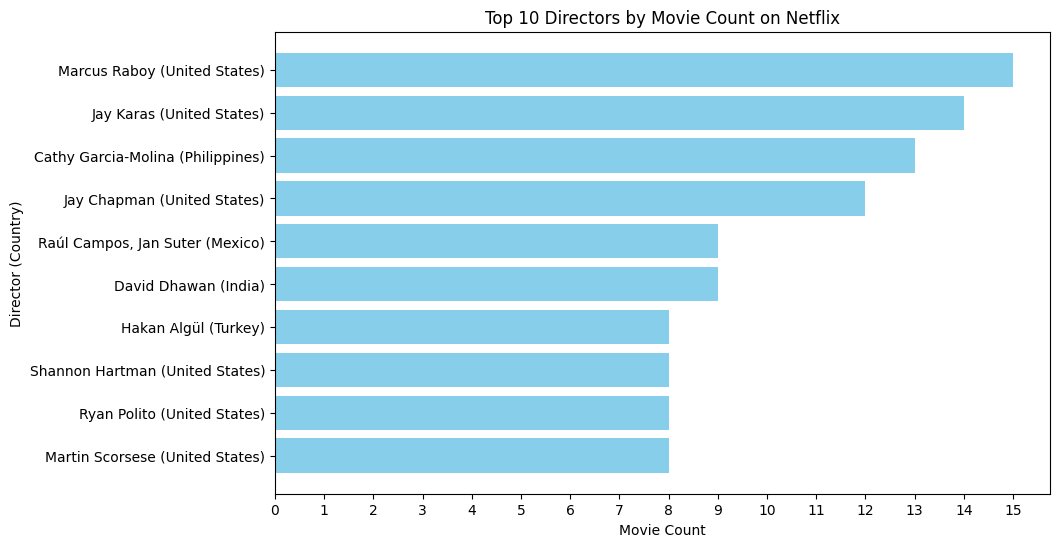

In [16]:
import matplotlib.pyplot as plt

df_filtered = df[df['director'] != 'No Records']

director_country_count = df_filtered.groupby(['director', 'country']).size().reset_index(name='count')


director_country_count['director_country'] = director_country_count['director'] + " (" + director_country_count['country'] + ")"

# Sort by count and select top 10
top_10_directors = director_country_count.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_directors['director_country'], top_10_directors['count'], color='skyblue')
plt.xlabel('Movie Count')
plt.ylabel('Director (Country)')
plt.title('Top 10 Directors by Movie Count on Netflix')

# Ensure x-axis displays only integer values
plt.xticks(range(0, int(top_10_directors['count'].max()) + 1))
plt.gca().invert_yaxis()
plt.show()


**Netflix watch group**

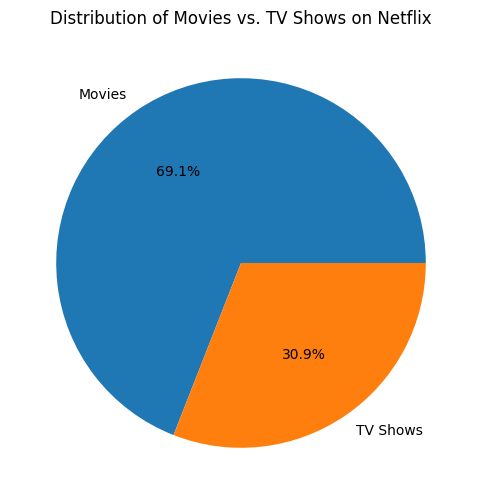

In [17]:
type_distribution = df['type'].value_counts()

type_distribution.plot(kind='pie', labels=['Movies', 'TV Shows'], autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.ylabel('')
plt.show()


**Famous Actors and Their Count of Movies from Country to Country**

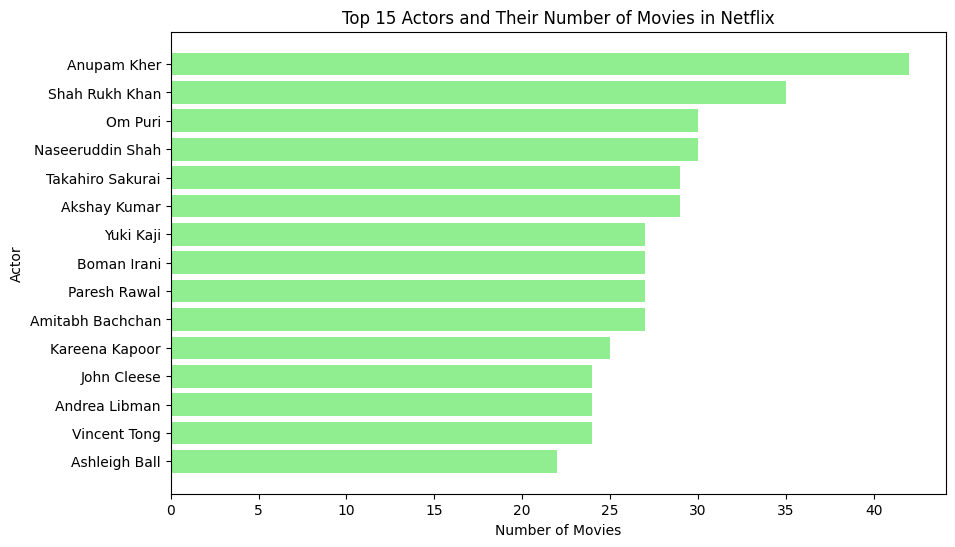

,cast,movies
0,Akshay Kumar,"Action Replayy, Aitraaz, Bewafaa, Bhagam Bhag,..."
1,Amitabh Bachchan,"Aarakshan, Agneepath, Amar Akbar Anthony, Badl..."
2,Andrea Libman,"Chip and Potato, Equestria Girls: Tales of Can..."
3,Anupam Kher,"A Family Man, A Wednesday, Aiyaary, C Kkompany..."
4,Ashleigh Ball,"Barbie: The Princess & the Popstar, Beat Bugs,..."
5,Boman Irani,"3 Idiots, BluffMaster!, Boom, Darna Mana Hai, ..."
6,John Cleese,"Albion: The Enchanted Stallion, An American Ta..."
7,Kareena Kapoor,"3 Idiots, Aitraaz, Asoka, Bewafaa, Bodyguard, ..."
8,Naseeruddin Shah,"3 Deewarein, 7 Khoon Maaf, A Wednesday, Aiyaar..."
9,Om Puri,"Action Replayy, Bhaji In Problem, Billu, Bolly..."


In [18]:

actors_per_country = df[['country', 'cast', 'title']].copy()
actors_per_country['cast'] = actors_per_country['cast'].str.split(',')
actors_per_country = actors_per_country.explode('cast')

actors_per_country['cast'] = actors_per_country['cast'].str.strip()

actors_per_country = actors_per_country[actors_per_country['cast'].str.lower() != 'unknown']

# Remove duplicates to get unique actor-movie pairs
actors_per_country_unique = actors_per_country.drop_duplicates(subset=['cast', 'title'])

# Group by 'cast' (actor) and count the number of unique movies for each actor
actor_counts = actors_per_country_unique.groupby('cast').size().reset_index(name='movie_count')

top_actors = actor_counts.sort_values(by='movie_count', ascending=False).head(15)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_actors['cast'], top_actors['movie_count'], color='lightgreen')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 15 Actors and Their Number of Movies in Netflix')
plt.gca().invert_yaxis()  # To have the actor with the highest number of movies on top
plt.show()

# Optionally, display the top actors with their movie titles
top_actors_movies = actors_per_country_unique[actors_per_country_unique['cast'].isin(top_actors['cast'])]
top_actors_movies_grouped = top_actors_movies.groupby('cast')['title'].apply(lambda x: ', '.join(x)).reset_index(name='movies')
top_actors_movies_grouped


In [19]:
# Group by 'listed_in' (genre) and count the number of occurrences
top_genre_directors = df.groupby(['listed_in', 'country']).size().reset_index(name='movie_count')

# Sort by movie count in descending order
top_genre_directors = top_genre_directors.sort_values(by='movie_count', ascending=False).reset_index(drop=True)

top_genre_directors

,listed_in,country,movie_count
0,Documentaries,United States,232
1,Stand-Up Comedy,United States,206
2,"Dramas, International Movies",India,116
3,"Comedies, Dramas, International Movies",India,114
4,"Dramas, Independent Movies, International Movies",India,97
...,...,...,...
2518,"Crime TV Shows, International TV Shows, TV Dramas","India, United States",1
2519,"Crime TV Shows, International TV Shows, TV Dramas",Hong Kong,1
2520,"Crime TV Shows, International TV Shows, TV Dramas","Germany, United States",1
2521,"Crime TV Shows, International TV Shows, TV Dramas","France, Belgium",1


In [20]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added,month_added,gap_years
0,1,3%,No Records,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,8.0,0.0
1,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,1,93,"Dramas, International Movies",2016.0,12.0,0.0
2,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,2,78,"Horror Movies, International Movies",2018.0,12.0,7.0
3,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,11.0,8.0
4,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,3,123,Dramas,2020.0,1.0,12.0
